# Hists Hists Hists ...

This notebook 
- loads pandas dataframes to plot 1d-hists
- loads hists objects to plot stacked 1d-hists

In [1]:
import argparse
from coffea import processor
from coffea.nanoevents.methods import candidate, vector
from coffea.analysis_tools import Weights, PackedSelection

import hist as hist2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
from hist.intervals import clopper_pearson_interval
import json
import uproot
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from coffea import nanoevents
from coffea import processor
import time

import argparse
import warnings
import pyarrow as pa
import pyarrow.parquet as pq
import pickle as pkl
import pandas as pd
import os
import sys
sys.path.append("../")

from collections import defaultdict
import pickle as pkl
import pyarrow as pa
import awkward as ak
import numpy as np
import pandas as pd
import json
import os
import shutil
import pathlib
from typing import List, Optional
import pyarrow.parquet as pq

from coffea import processor
from coffea.nanoevents.methods import candidate, vector
from coffea.analysis_tools import Weights, PackedSelection
from boostedhiggs.utils import match_HWW
from boostedhiggs.btag import btagWPs
from boostedhiggs.btag import BTagCorrector

import hist as hist2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
from hist.intervals import clopper_pearson_interval

import warnings
warnings.filterwarnings("ignore", message="Found duplicate branch ")
warnings.filterwarnings("ignore", category=DeprecationWarning)
np.seterr(invalid='ignore')

/opt/anaconda3/envs/pyg-coffea/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## 1d-Hists from pandas dataframes

In [34]:
! ls tagger

data_ele_tagger_score.csv data_mu_tagger_score.csv


In [35]:
data = {}
data['ele'] = pd.read_csv('tagger/data_ele_tagger_score.csv')
data['mu'] = pd.read_csv('tagger/data_mu_tagger_score.csv')

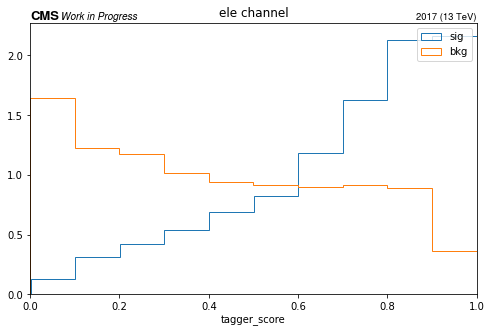

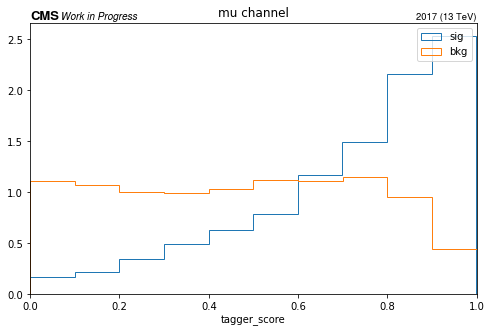

In [36]:
year = '2017'
channels = ['ele', 'mu']
for ch in channels:
    
    fig, ax = plt.subplots(figsize=(8, 5))

    # make plots per channel
    plt.hist(data[ch]['tagger_score'][data[ch]['sample']=='GluGluHToWWToLNuQQ'], 
#                      bins=50, 
             label='sig', 
             density=True,
             histtype='step',)
#                  weights=data[ch]['weight'][data[ch]['sample']==sample])

    plt.hist(data[ch]['tagger_score'][data[ch]['sample']!='GluGluHToWWToLNuQQ'], 
#                      bins=50, 
             label='bkg', 
             density=True,
             histtype='step',
            weights=data[ch]['weight'][data[ch]['sample']!='GluGluHToWWToLNuQQ'])

    ax.legend()
    ax.set_xlabel(f"tagger_score")
    ax.set_title(f'{ch} channel')
    ax.set_xlim(0,1)
    hep.cms.lumitext(f"{year} (13 TeV)", ax=ax)
    hep.cms.text("Work in Progress", ax=ax);
#     plt.savefig(f'/Users/fmokhtar/Desktop/plots/{ch}_gen_HpTplots.pdf')
    # plt.close()
#     break

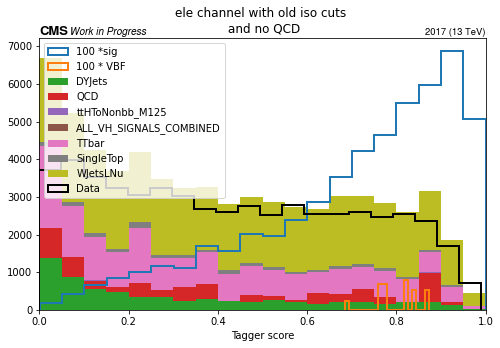

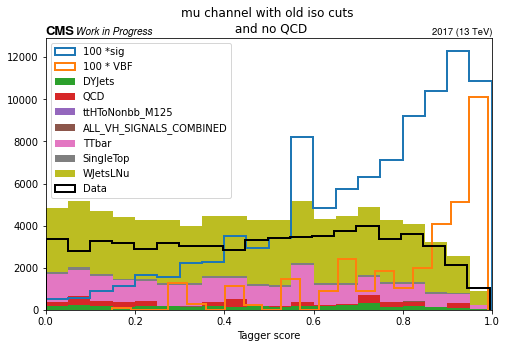

In [37]:
year = '2017'
channels = ['ele', 'mu']
is_data = {'ele': 'SingleElectron', 'mu': 'SingleMuon'}
for ch in channels:
    
    fig, ax = plt.subplots(figsize=(8, 5))

    # GluGluHToWWToLNuQQ
    plt.hist(data[ch]['tagger_score'][data[ch]['sample']=='GluGluHToWWToLNuQQ'], 
             bins=20,
             label='100 *sig', 
#              density=True,
             histtype='step',
             linewidth=2,
                weights=100*data[ch]['weight'][data[ch]['sample']=='GluGluHToWWToLNuQQ']
            )
    
    # VBF 
    plt.hist(data[ch]['tagger_score'][data[ch]['sample']=='VBFHToWWToLNuQQ-MH125'], 
            bins=20, 
             label='100 * VBF', 
#              density=True,
             histtype='step',
             linewidth=2,             
                weights=100*data[ch]['weight'][data[ch]['sample']=='VBFHToWWToLNuQQ-MH125']

            )
    
    # background
    xs = []
    labels = []
    weightss = []
    
    samples = data[ch]['sample'].unique()
    for sample in samples:
        if sample !='GluGluHToWWToLNuQQ' and sample !='VBFHToWWToLNuQQ-MH125' and sample != is_data[ch]:
            xs.append(data[ch]['tagger_score'][data[ch]['sample']==sample])
            labels.append(sample)
            weightss.append(data[ch]['weight'][data[ch]['sample']==sample])

    plt.hist(xs, 
             label=labels, 
             bins=20,             
#              density=True,
#              histtype='step',
             stacked=True,
            weights=weightss)

    # data
    plt.hist(data[ch]['tagger_score'][data[ch]['sample']==is_data[ch]], 
            bins=20, 
             label='Data', 
#              density=True,
             histtype="step",
             color="k",
#              capsize=4,
             linewidth=2,             
                weights=data[ch]['weight'][data[ch]['sample']==is_data[ch]]

            )
    
    ax.legend(loc='upper left')
    ax.set_xlabel(f"Tagger score")
    ax.set_title(f'{ch} channel with old iso cuts \n and no QCD')
    ax.set_xlim(0,1)
    hep.cms.lumitext(f"{year} (13 TeV)", ax=ax)
    hep.cms.text("Work in Progress", ax=ax);
    plt.savefig(f'/Users/fmokhtar/Desktop/plots/{ch}_tagger_score_old_cuts.pdf')
    # plt.close()
#     break